Import Library yang akan kita butuhkan

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

from collections import Counter
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import classification_reportrt, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [188]:
data  = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv");

Prepaire data , merubah data nan menjadi 0. dan untuk rating yang datanya Nan dijadikan E

In [189]:
data.fillna(0.00,inplace = True)
data["Rating"].replace("0","E")

0        E
1        0
2        E
3        E
4        0
        ..
16714    0
16715    0
16716    0
16717    0
16718    0
Name: Rating, Length: 16719, dtype: object

In [91]:
data

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               0.0           0.0          0         0.0         0      0  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               0.0           0.0          0         0.0         0      0  
...             ...           ...        ...         ...       ...    ...  
16714           0.0           0.0          0         0.0         0      0  
16715           0.0           0.0          0         0.0         0      0  
16716           0.0           0.0          0         0.0         0      0  
16717           0.0           0.0          0         0.0         0      0  
16718           0.0           0.0          0         0.0         0      0  

[16719 rows x 16 columns]

In [25]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(16719, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  object 
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: flo

In [26]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)
report

In [363]:
data["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 0.0], dtype=object)

In [229]:
data_jumlah =  data.Genre.value_counts()

3370

In [268]:
data_sum = data.groupby(["Genre"]).sum()
data_sort = data_sum.sort_values(by = ["Global_Sales"],ascending = False)
data_sort

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Genre                                                                      
Action              6642630.0    879.01    519.13    161.44       184.60   
Sports              4624690.0    684.43    376.79    135.54       134.51   
Shooter             2599819.0    592.24    317.34     38.76       104.11   
Role-Playing        2976575.0    330.81    188.71    355.46        59.63   
Platform            1759387.0    445.50    200.35    130.83        51.09   
Misc                3454612.0    407.27    212.74    108.11        74.39   
Racing              2457964.0    359.35    236.51     56.71        76.10   
Fighting            1677895.0    223.36    100.33     87.48        36.36   
Simulation          1721717.0    182.19    113.52     63.80        30.75   
Puzzle              1140976.0    122.87     50.01     57.31        12.38   
Adventure           2596685.0    105.26     63.54     52.30        16.49   
Strategy            1349781.0     68.55     45.17     49.66        10.85   
0.0                    3986.0      1.78      0.53      0.03         0.08   

              Global_Sales  Critic_Score  Critic_Count  User_Count  
Genre                                                               
Action             1745.27      125929.0       52506.0    345668.0  
Sports             1332.00       85930.0       25110.0     45849.0  
Shooter            1052.94       66251.0       33616.0    346110.0  
Role-Playing        934.40       53545.0       23945.0    238315.0  
Platform            828.08       33825.0       11778.0     46707.0  
Misc                803.18       34842.0       11262.0     13659.0  
Racing              728.90       50429.0       17087.0     44468.0  
Fighting            447.48       28310.0       11415.0     25907.0  
Simulation          390.42       24154.0        7549.0     28434.0  
Puzzle              243.02       15103.0        4549.0      4160.0  
Adventure           237.69       21102.0        7143.0     31023.0  
Strategy            174.50       21770.0        8538.0     61025.0  
0.0                   2.42           0.0           0.0         0.0

C:\Users\Dimas-BG\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


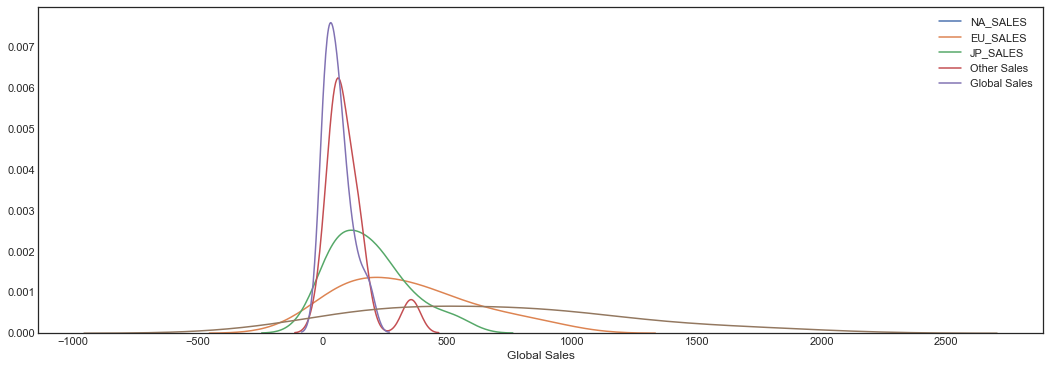

In [194]:
plt.figure(figsize =(18,6))
sns.kdeplot(action)
sns.kdeplot(data_sort.NA_Sales)
sns.kdeplot(data_sort.EU_Sales)
sns.kdeplot(data_sort.JP_Sales)
sns.kdeplot(data_sort.Other_Sales)
sns.kdeplot(data_sort.Global_Sales)
plt.legend(["NA_SALES", "EU_SALES","JP_SALES","Other Sales","Global Sales"])
plt.xlabel("Global Sales")
plt.show()

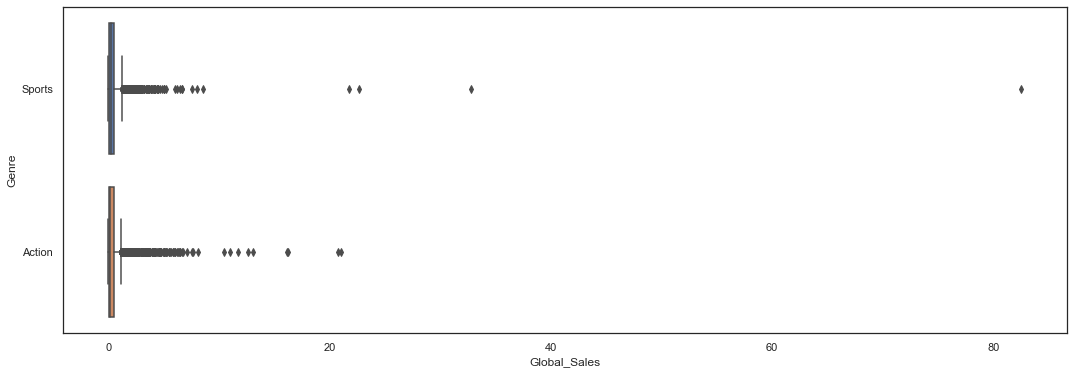

In [314]:
data2teratas = data[(data.Genre =="Action") | (data.Genre =="Sports" )]
plt.figure(figsize =(18,6))
sns.boxplot("Global_Sales",data2teratas.Genre, data=data2teratas)
plt.show()

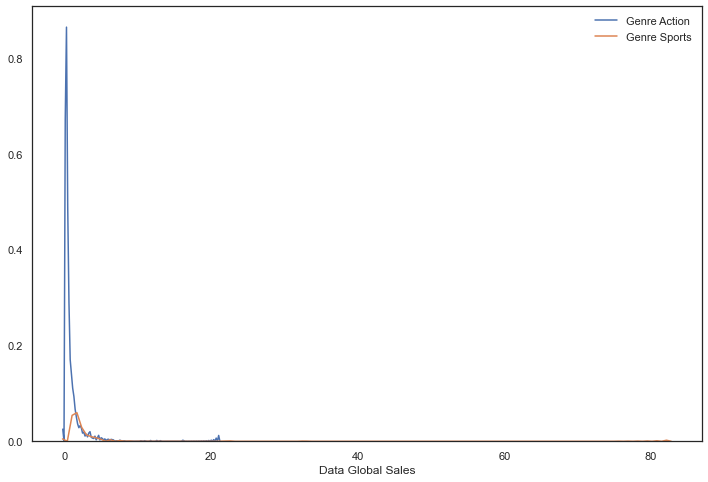

In [292]:
# kodeplot = data_sort.head(2)
action = data_sort.Global_Sales[data_sort.index == "Action"];
sport = data_sort.Global_Sales[data_sort.index == "Sports"].sum().round();
action
sns.kdeplot(data.Global_Sales[data.Genre == "Action"])
sns.kdeplot(data.Global_Sales[data.Genre == "Sports"])
plt.legend(["Genre Action", "Genre Sports"])
plt.xlabel("Data Global Sales")
plt.show()

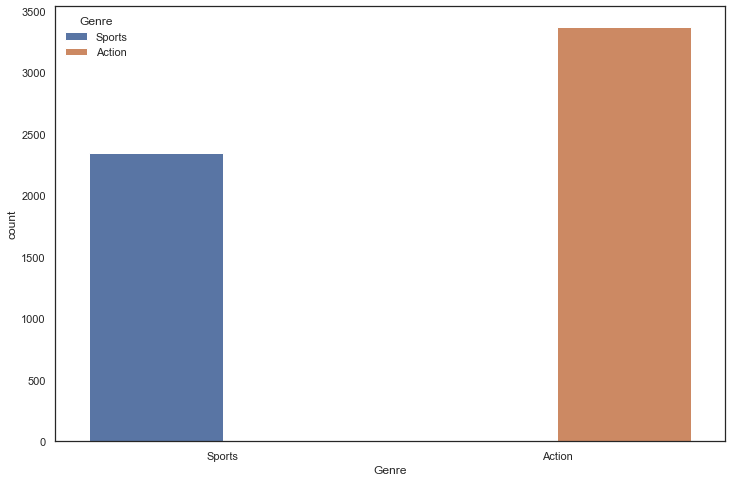

In [311]:
sns.countplot("Genre", hue="Genre", data=data2teratas)
plt.show()


In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

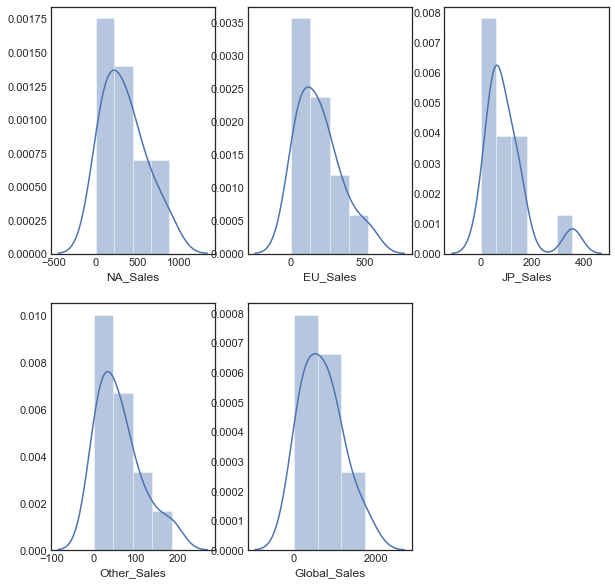

In [320]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data_sort['NA_Sales'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data_sort['EU_Sales'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data_sort['JP_Sales'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data_sort['Other_Sales'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data_sort['Global_Sales'])
fig = plt.gcf()
fig.set_size_inches(10,10)

In [359]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

# label_encoder = LabelEncoder()
# for col in object_cols:
#     data[col] = label_encoder.fit_transform(data[col])
data.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           0.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           0.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           0.0          0         0.0         0      0  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           0.0          0         0.0         0      0

In [396]:
X = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']];
y = data['User_Count'].apply(np.int64) 

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [402]:

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.541267942583732
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2726
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        99
           6       0.00      0.00      0.00       106
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00        90
           9       0.00      0.00      0.00        71
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        57
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00        49
          14       0.00      0.00      0.00        51
          15       0.00      0.00      0.00        48
          16       0.00      0.00      0.00        43
          17       0.00      0.00      0.00        52
          18       0.00      0.00      0.00        35
          19       0.00      0.00      0.00    

C:\Users\Dimas-BG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimas-BG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimas-BG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.

In [403]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.48325358851674644
